February: Images for Ocean Sciences poster - W vel pcolormesh slices.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import ticker
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import math

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def get_vars_at_depth_OSM(dirname, fname, maskname, dep_ind):
    
    filesU = general_functions.get_files(dirname, fname, 'grid_U')        
    filesW = general_functions.get_files(dirname, fname, 'grid_W')
    filesT = general_functions.get_files(dirname, fname, 'grid_T')
    print('files')
    
    y,x = slice(1,-1,None), slice(1,-1,None)
    time_ind = 24

    with scDataset(filesU) as dsU, scDataset(filesW) as dsW, scDataset(filesT) as dsT:
        vovecrtz0 = dsW.variables['vovecrtz'][:,dep_ind,y,x]
        print('W')
        sozotaux = dsU.variables['sozotaux'][:,0,0]
        depthw = dsW.variables['depthw'][:]
        nav_lat = dsT.variables['nav_lat'][y, x]
        nav_lon = dsT.variables['nav_lon'][y, x]

    with nc.Dataset(os.path.join(dirname, maskname), 'r') as dsM:
        tmask0 = dsM.variables['tmask'][0,dep_ind,y,x]

    tmask = np.tile(tmask0, (len(sozotaux), 1, 1))
    tmask_orig = np.tile(tmask0, (1, 1, 1))  

    vovecrtz = np.ma.array(vovecrtz0, mask=1 - tmask)
    
    return vovecrtz, tmask, depthw, sozotaux, nav_lat, nav_lon

# Depth index

In [3]:
dep_ind = 11

In [4]:
time_range = [23, 35, 83]
time_range

[23, 35, 83]

# Ideal

In [5]:
def plot_W_hr(vovecrtz, vovecrtzp, nav_lon, nav_lat, nav_lonp, nav_latp, depthw, dep_ind, n, kind):
    vmin, vmax = -1.4, 1.4
    levels = [-0.2, 0.2]
    cmap = plt.get_cmap(cmo.cm.balance)
    cmap.set_bad('silver')
    
    fig, ax = plt.subplots(1, 1, figsize = (20, 15))
    
    y_top = 145
    x_top = 50
    x_half= x_top/2
    x_left = x_top + x_half
    x_right = x_top - x_half
    
    if kind == 'ideal':
        # parent
        vovecrtz_plot_p = vovecrtzp[n, :y_top, x_top:-x_top] * 1000
        xp = nav_lonp[:y_top, x_top:-x_top]
        yp = nav_latp[:y_top, x_top:-x_top]
        pp = ax.pcolormesh(xp, yp, vovecrtz_plot_p,
                           cmap=cmap, vmin=vmin, vmax=vmax, zorder=1)
    elif kind == 'real':
        # parent
        vovecrtz_plot_p = vovecrtzp[n, :y_top, x_left:-x_right] * 1000
        xp = nav_lonp[:y_top, x_left:-x_right]
        yp = nav_latp[:y_top, x_left:-x_right]
        pp = ax.pcolormesh(nav_lonp[:y_top, x_left:-x_right], nav_latp[:y_top, x_left:-x_right], vovecrtz_plot_p,
                           cmap=cmap, vmin=vmin, vmax=vmax, zorder=1)

    vovecrtz_plot_c = vovecrtz[n, :, :] * 1000
    pc = ax.pcolormesh(nav_lon, nav_lat, vovecrtz_plot_c, cmap=cmap, vmin=vmin, vmax=vmax)
    
    axins = inset_axes(ax,
                    width="40%",  # width = 10% of parent_bbox width
                    height="5%",  # height : 50%
                    loc=2)
    axins.xaxis.set_ticks_position("bottom")
    cbar = fig.colorbar(pc, cax=axins, orientation='horizontal', ticks=np.arange(-1*vmax, vmax+0.7, 0.7))#, pad=cpad, fraction=cbarf)
    cbar.set_label('w-velocity [ms$^{-1}$]', fontsize=35, rotation=0, labelpad=3.0)
    #tick_locator = ticker.MaxNLocator(nbins=4)
    #cbar.locator = tick_locator
    #cbar.update_ticks()
    cbar.ax.tick_params(labelsize=20)
 
    ax.tick_params(axis='both', which='both', labelsize=20)
    ax.set_ylabel('Latitude', fontsize=35)
    ax.set_xlabel('Longitude', fontsize=35)
    w=1/math.cos(math.radians(70.0))
    ax.set_aspect(w)
    ax.set_xlim([xp.min(), xp.max()])
    ax.set_ylim([yp.min(), yp.max()])
    fig.tight_layout()
    fig.savefig('../../OSM_images/wave_'+kind+str(int(depthw[dep_ind]))+'_'+str(n+1)+'_new.png')
    return fig

In [6]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_half_flt/'
fname = "1_MCKNZ_1h_20170101_20170120_*"
maskname = '1_mesh_mask.nc'

vovecrtz, tmask, depthw, sozotaux, nav_lat, nav_lon = get_vars_at_depth_OSM(dirname, fname, maskname, dep_ind)

files
W


In [7]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_half_flt/'
fname = "MCKNZ_1h_20170101_20170120_*"
maskname = 'mesh_mask.nc'

vovecrtzp, tmaskp, depthwp, sozotauxp, nav_latp, nav_lonp = get_vars_at_depth_OSM(dirname, fname, maskname, dep_ind)

files
W


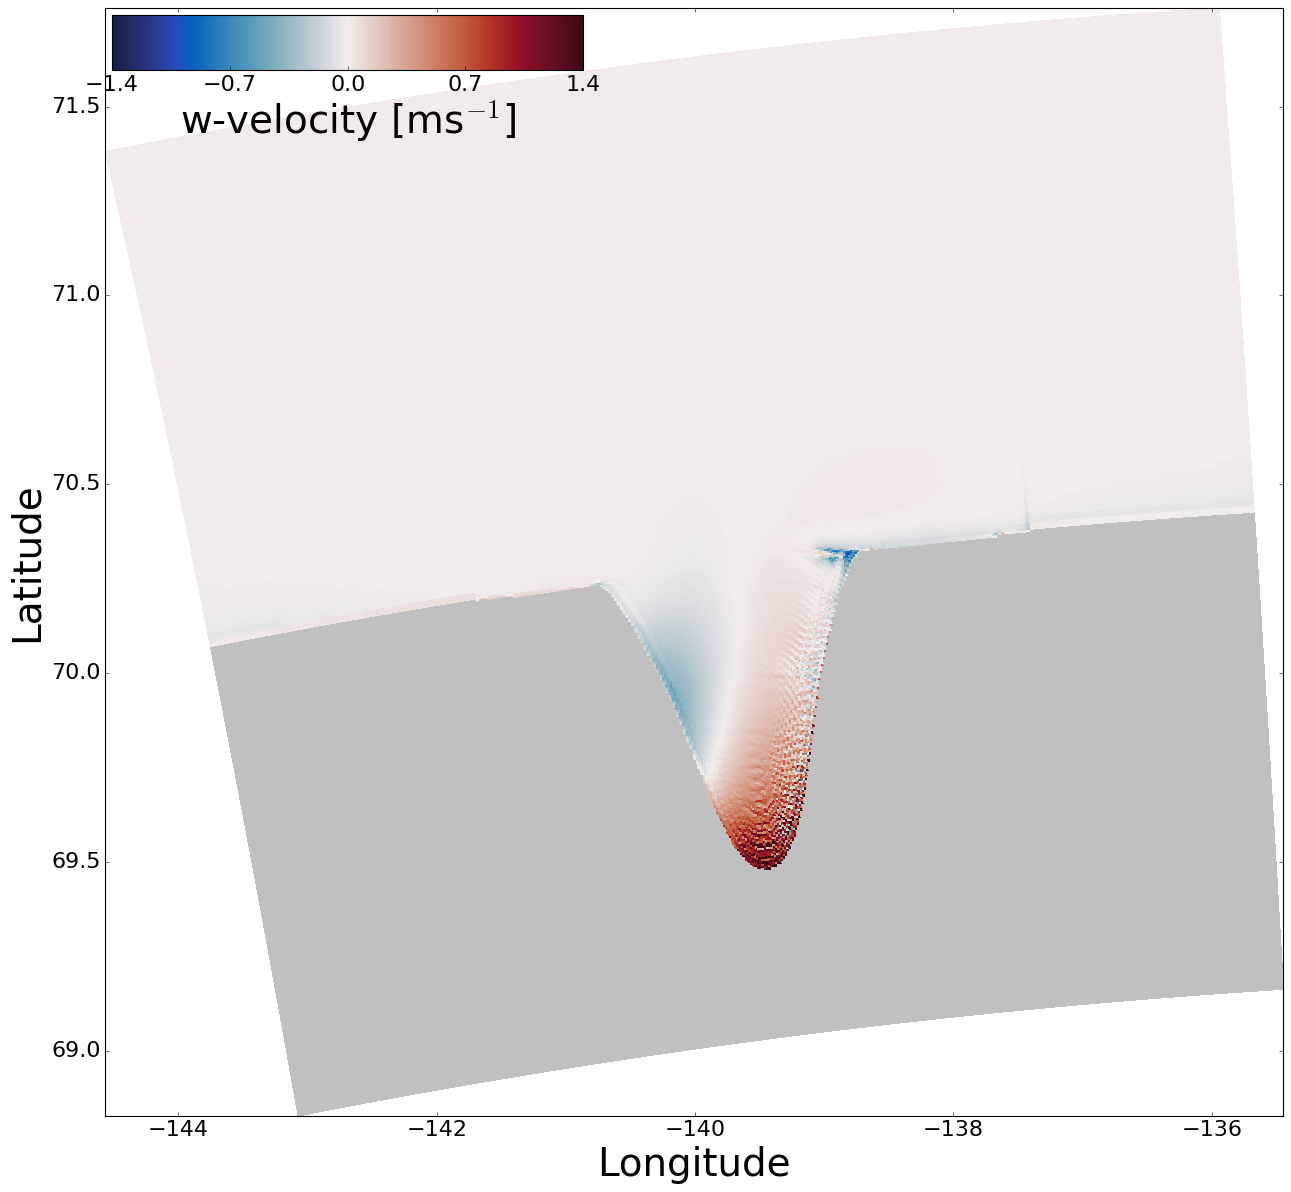

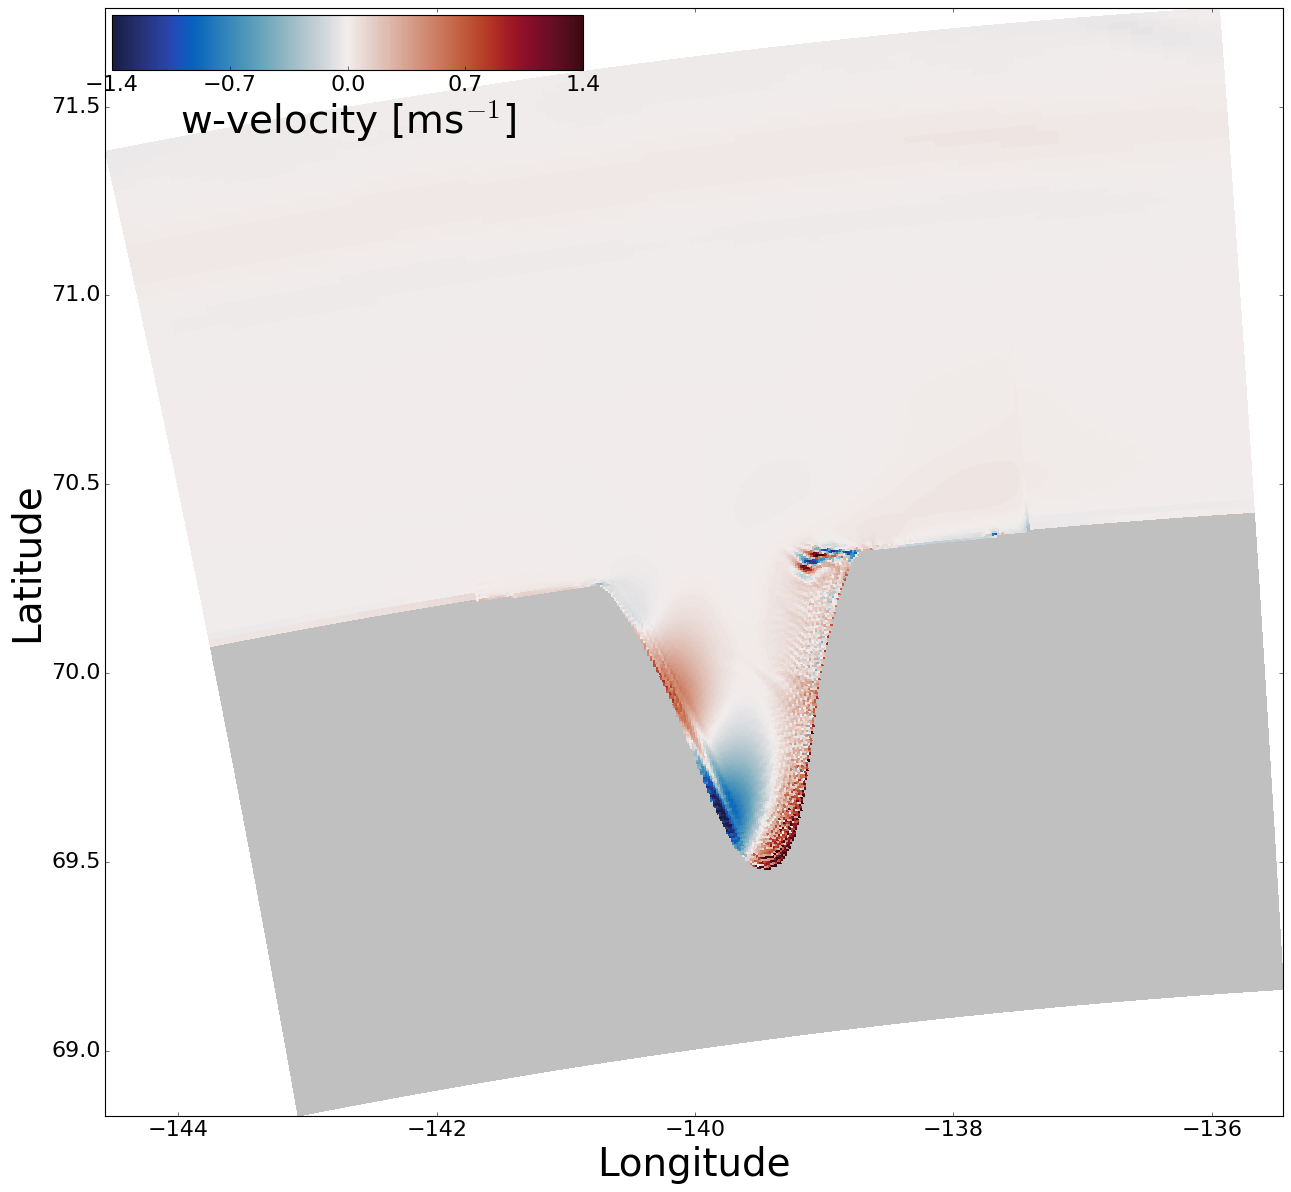

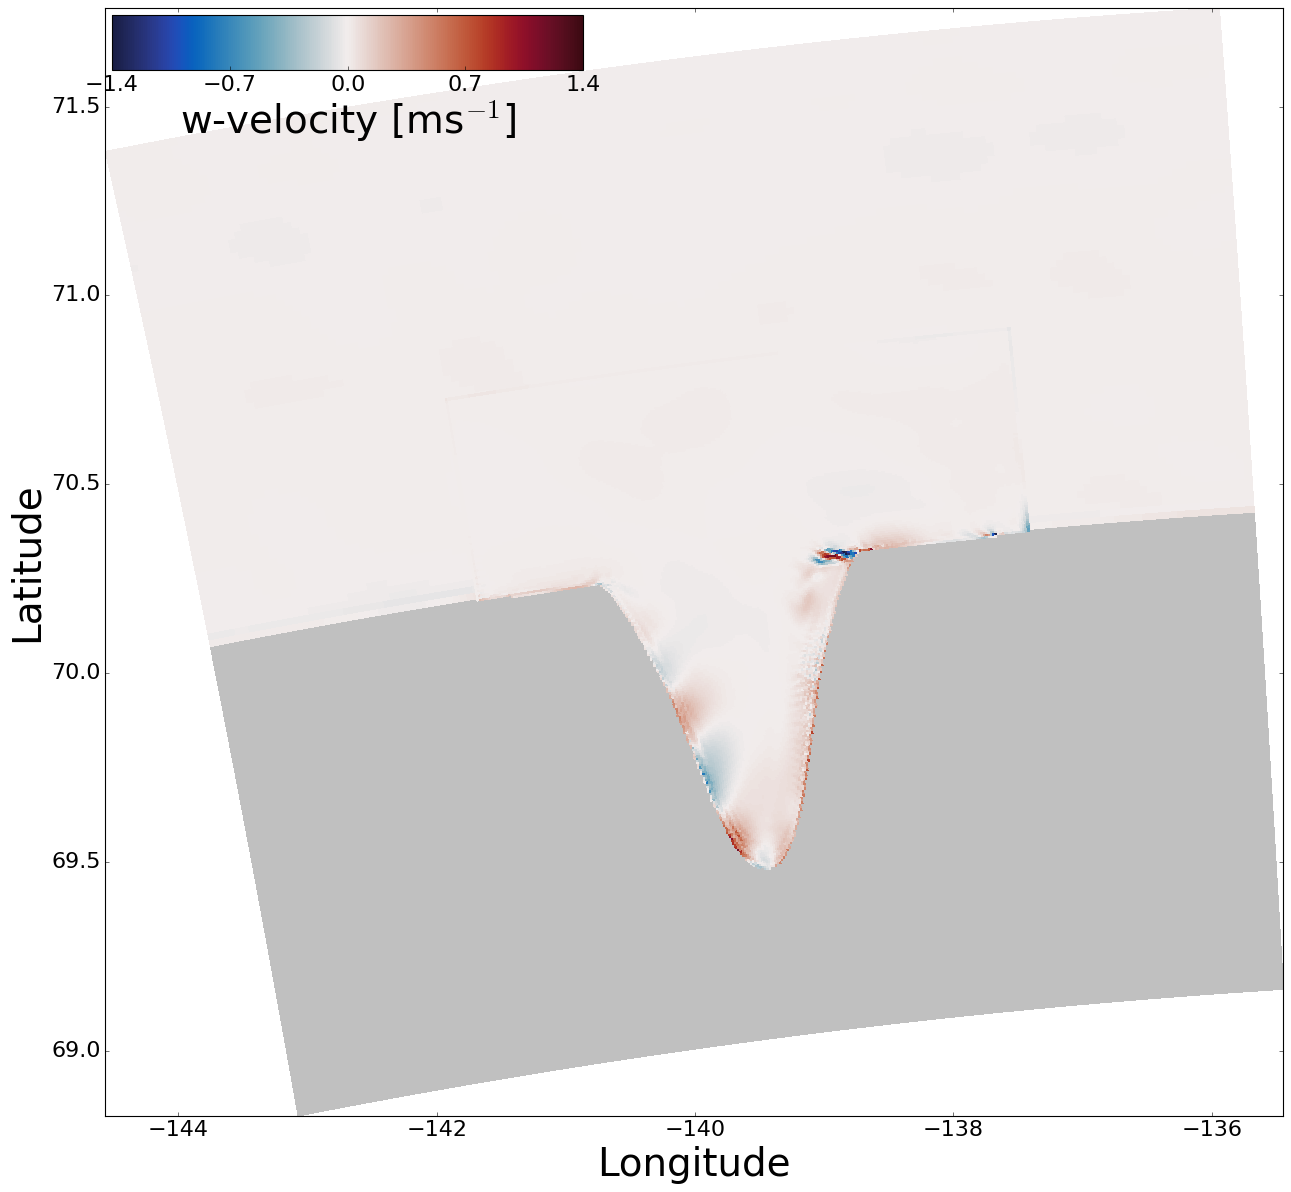

In [8]:
for n in time_range:
    fig  = plot_W_hr(vovecrtz, vovecrtzp, nav_lon, nav_lat, nav_lonp, nav_latp, depthw, dep_ind, n, 'ideal')

# Real

In [9]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_half/'
fname = "1_MCKNZ_1h_20170101_20170120_*"
maskname = '1_mesh_mask.nc'

vovecrtzr, tmaskr, depthwr, sozotauxr, nav_latr, nav_lonr = get_vars_at_depth_OSM(dirname, fname, maskname, dep_ind)

files
W


In [10]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_half/'
fname = "MCKNZ_1h_20170101_20170120_*"
maskname = 'mesh_mask.nc'

vovecrtzrp, tmaskrp, depthwrp, sozotauxrp, nav_latrp, nav_lonrp = get_vars_at_depth_OSM(dirname, fname, maskname, dep_ind)

files
W


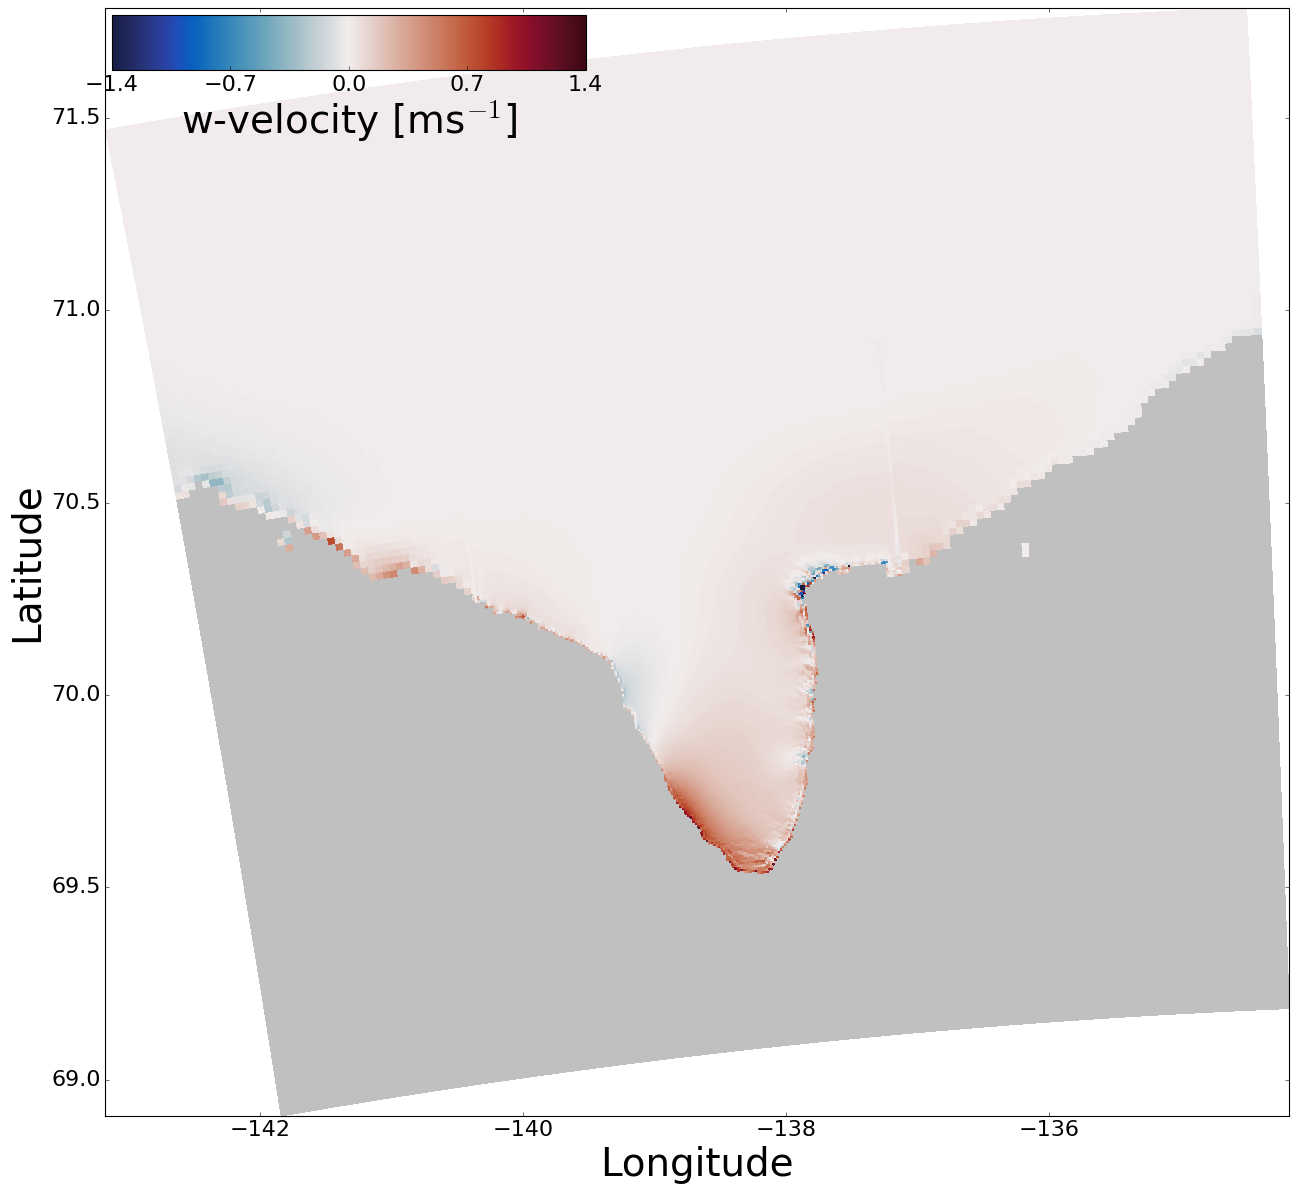

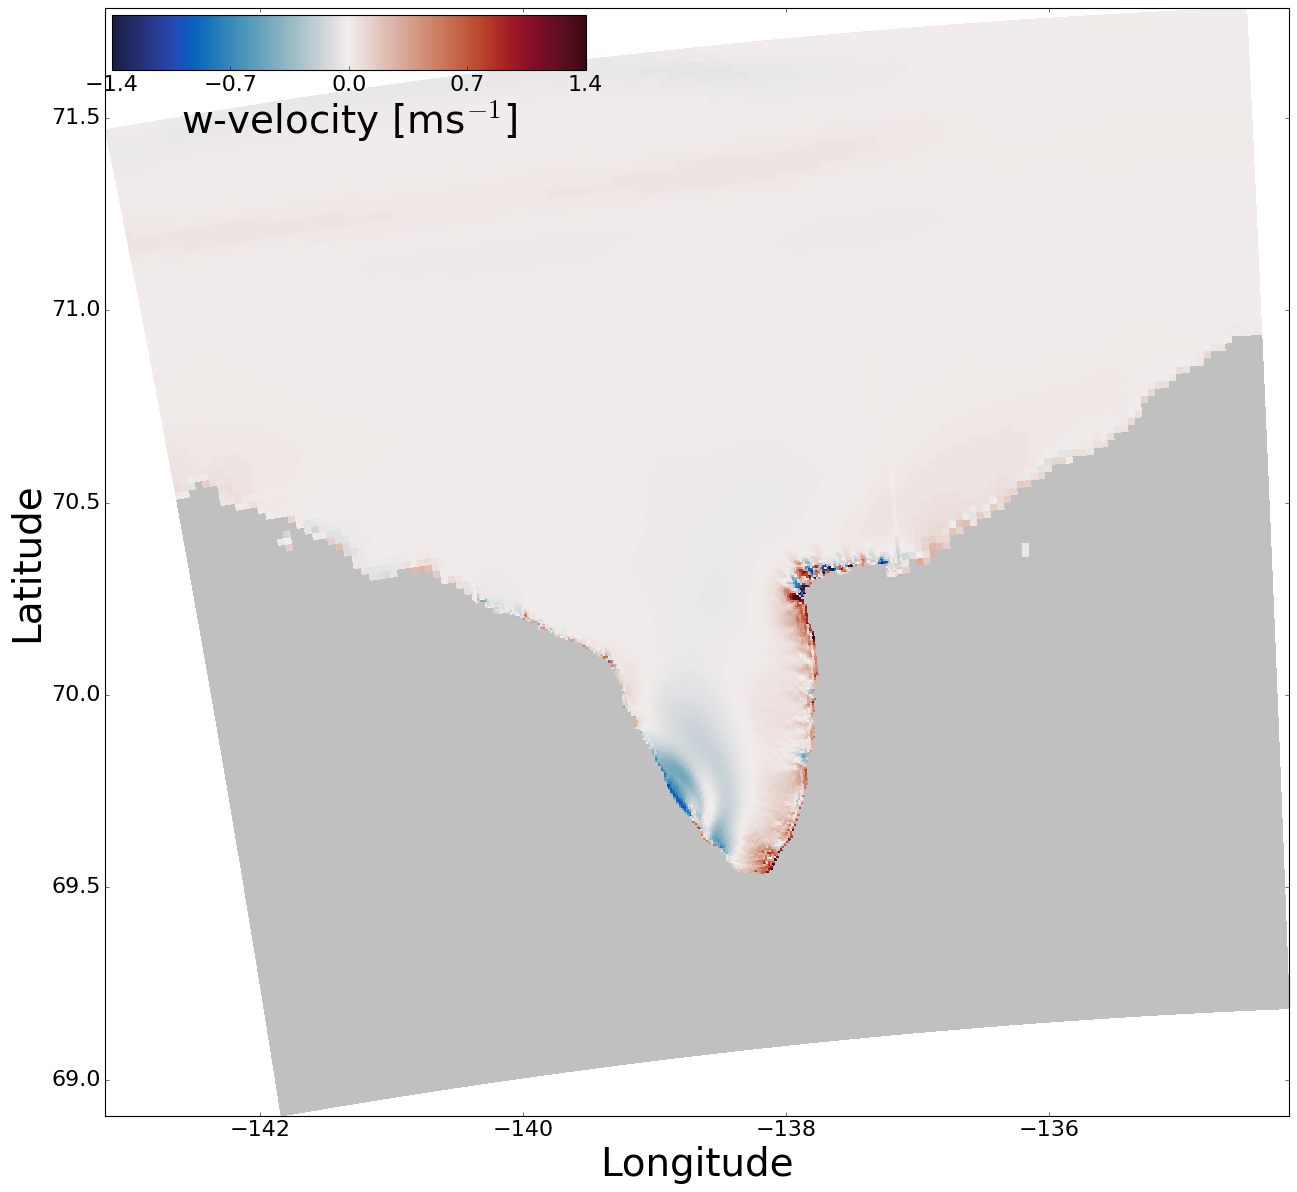

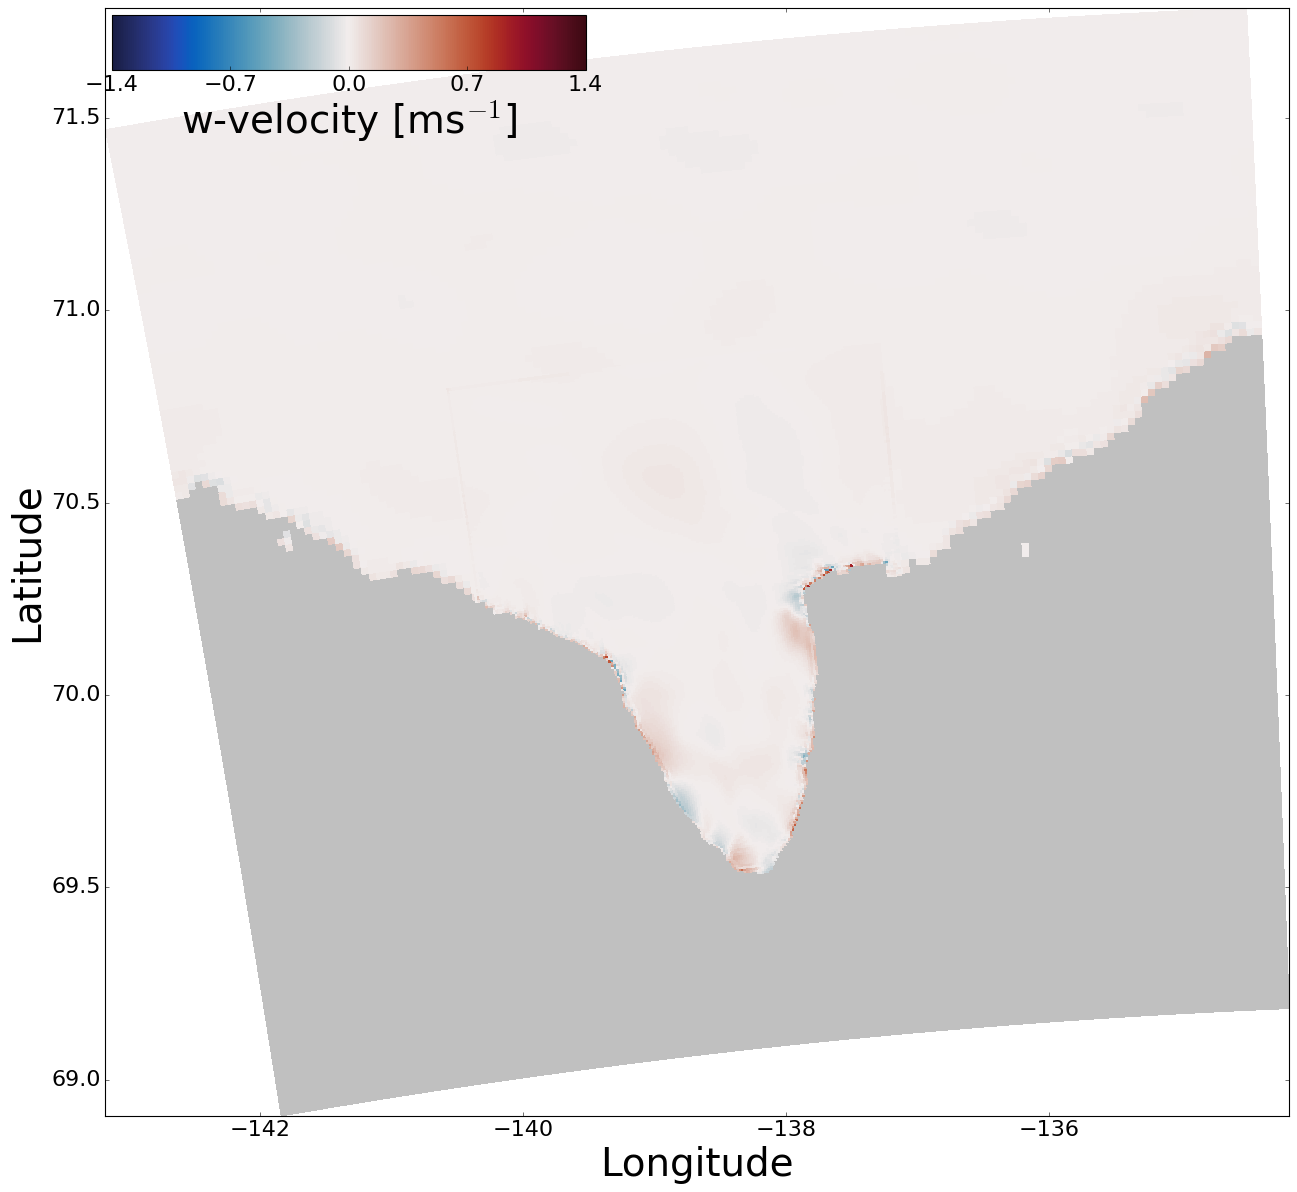

In [11]:
cbarf, cpad = 0.031, 0.07

for n in time_range:
    fig  = plot_W_hr(vovecrtzr, vovecrtzrp, nav_lonr, nav_latr, nav_lonrp, nav_latrp, depthwr, dep_ind, n, 'real')